## **Laboratorio 3**
Juan Pablo Solis
Isabella Miralles

### **link github**
https://github.com/JPS4321/lab3_datascience
### **Parte 1, Modelos de Deep Learning**

In [ ]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops
from keras.models import load_model



### **Visualizacion de Datos**

### **M0**

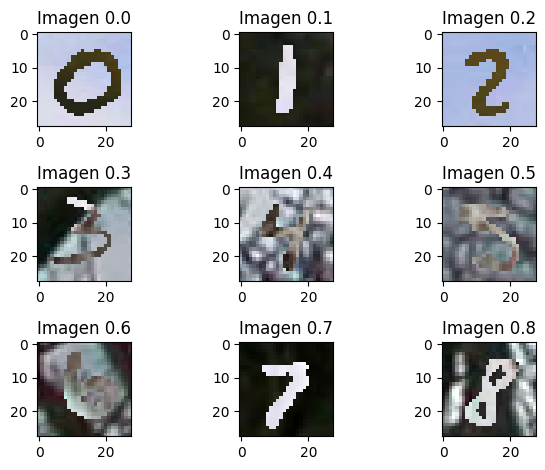

In [ ]:
import matplotlib.pyplot as plt
import os

folder = "./MMNIST/train/m0/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M1**

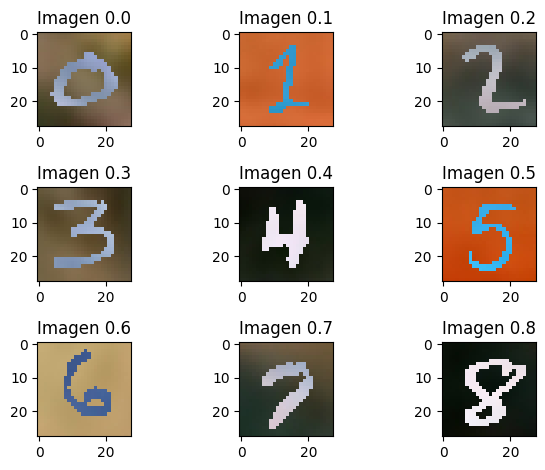

In [ ]:



folder = "./MMNIST/train/m1/"


for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M2**

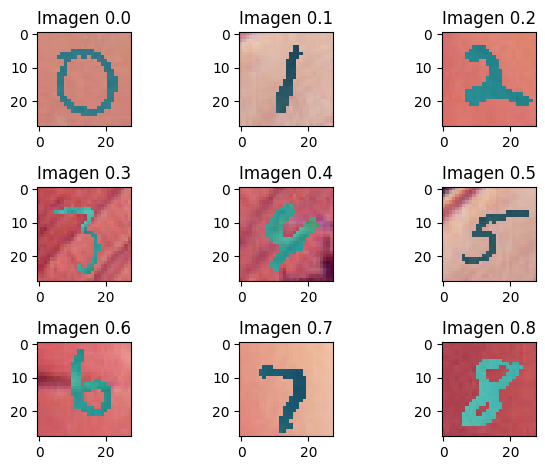

In [ ]:


folder = "./MMNIST/train/m2/"


for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


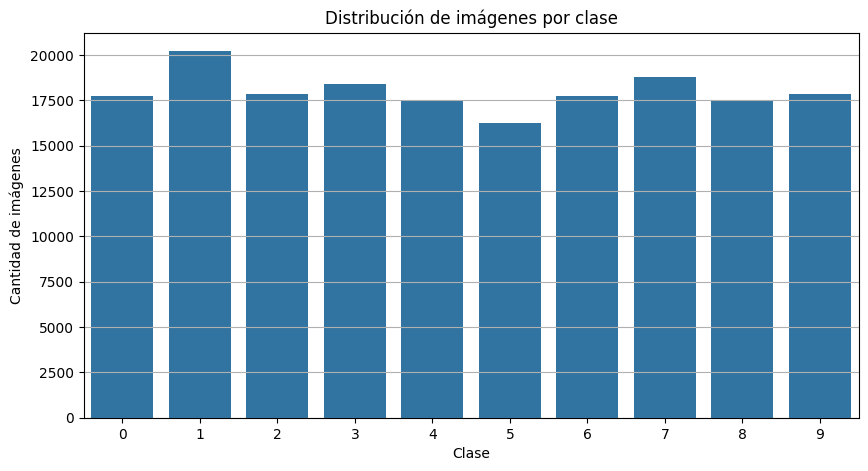

Resoluciones de las imágenes (ancho x alto):
  (28, 28): 1000 muestras

Promedio de imágenes por clase: 18000.00
Desviación estándar: 966.25


In [ ]:



ruta_dataset = './MMNIST_reorganizado/train'


conteo_clases = {}
resoluciones = []

for clase in sorted(os.listdir(ruta_dataset)):
    ruta_clase = os.path.join(ruta_dataset, clase)
    if os.path.isdir(ruta_clase):
        archivos = os.listdir(ruta_clase)
        conteo_clases[clase] = len(archivos)
        
        
        for archivo in archivos[:100]:
            img_path = os.path.join(ruta_clase, archivo)
            with Image.open(img_path) as img:
                resoluciones.append(img.size)  


plt.figure(figsize=(10,5))
sns.barplot(x=list(conteo_clases.keys()), y=list(conteo_clases.values()))
plt.title("Distribución de imágenes por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.grid(axis='y')
plt.show()


res_counter = Counter(resoluciones)
print("Resoluciones de las imágenes (ancho x alto):")
for res, count in res_counter.items():
    print(f"  {res}: {count} muestras")


valores = list(conteo_clases.values())
media = np.mean(valores)
desviacion = np.std(valores)
print(f"\nPromedio de imágenes por clase: {media:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")



### **Divison Testing y Train**

In [ ]:
"""
import os
import shutil

origen_train = "./MMNIST/test"
destino_train = "./MMNIST_reorganizado/test"

# Crear carpetas destino 0–9
for i in range(10):
    os.makedirs(os.path.join(destino_train, str(i)), exist_ok=True)

# Recorre m0, m1, m2
for carpeta_estilo in os.listdir(origen_train):
    ruta_estilo = os.path.join(origen_train, carpeta_estilo)
    if os.path.isdir(ruta_estilo):
        for archivo in os.listdir(ruta_estilo):
            if archivo.endswith(".png"):
                try:
                    # Extraer la clase desde el nombre: parte después del punto
                    clase = int(archivo.split(".")[1])  # ej: "2.7.png" → clase = 7
                    origen = os.path.join(ruta_estilo, archivo)
                    destino = os.path.join(destino_train, str(clase), f"{carpeta_estilo}_{archivo}")
                    shutil.copy(origen, destino)
                except (IndexError, ValueError):
                    print(f"Nombre inválido: {archivo}")
"""

### **Cargar Imagenes por lote**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './MMNIST_reorganizado/train',
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    shuffle=True  
)

test_generator = test_datagen.flow_from_directory(
    './MMNIST_reorganizado/test',
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical'
)


Found 180000 images belonging to 10 classes.
Found 30000 images belonging to 10 classes.


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Entrenamiento Modelo CNN Simple**

In [14]:

history = model.fit(
    train_generator,
    epochs=10,                   
    validation_data=test_generator
)


Epoch 1/10


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 117s 83ms/step - accuracy: 0.7799 - loss: 0.6834 - val_accuracy: 0.9591 - val_loss: 0.1297
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9628 - loss: 0.1217 - val_accuracy: 0.9687 - val_loss: 0.1006
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9729 - loss: 0.0857 - val_accuracy: 0.9730 - val_loss: 0.0865
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9781 - loss: 0.0692 - val_accuracy: 0.9729 - val_loss: 0.0844
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.9836 - loss: 0.0518 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.9894 - loss: 0.0324 - val_accuracy: 0.9779 - val_loss: 0.0770
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9918 - loss: 0.0

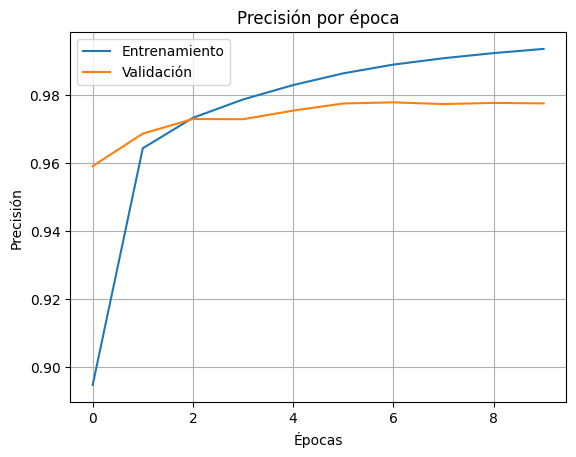

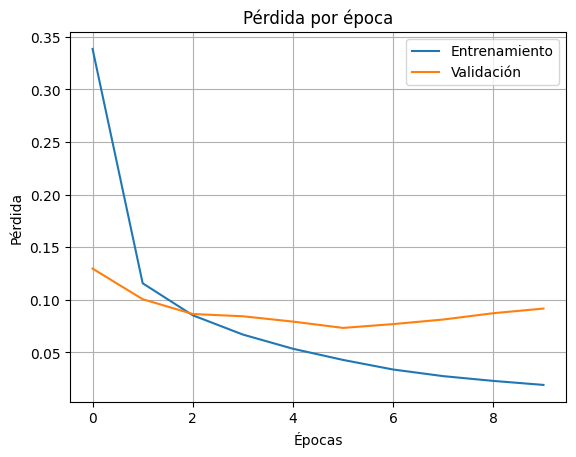

In [ ]:


# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
model.save("modelos/modeloCNN.keras")

In [ ]:
print(train_generator.class_indices)  
print(train_generator.classes[:20])   


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('> %.3f' % (acc * 100.0)) 


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9767 - loss: 0.0936
> 97.757


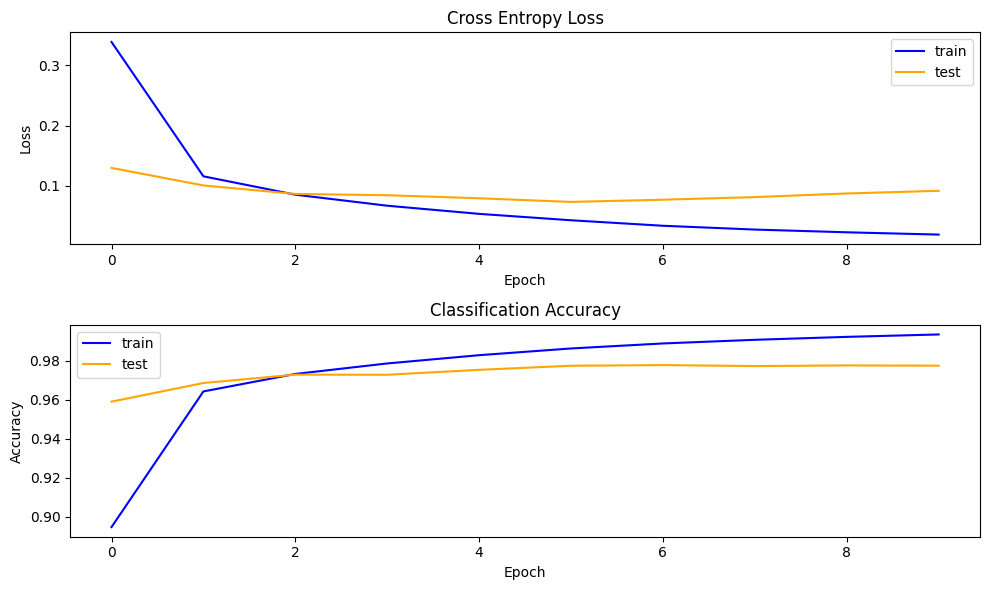

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


### **Modelo CNN con VGG de 2 bloques**

In [ ]:
from tensorflow import keras

model = keras.Sequential()

# Bloque VGG 1
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                              padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))

# Bloque VGG 2
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))

# Clasificación
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))  

# Compilación
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,218 (1.61 MB)

 Trainable params: 422,218 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#  EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 172s 122ms/step - accuracy: 0.7756 - loss: 0.6929 - val_accuracy: 0.9499 - val_loss: 0.1574
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.9605 - loss: 0.1294 - val_accuracy: 0.9653 - val_loss: 0.1088
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step - accuracy: 0.9716 - loss: 0.0901 - val_accuracy: 0.9665 - val_loss: 0.1036
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.9786 - loss: 0.0696 - val_accuracy: 0.9728 - val_loss: 0.0834
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.9825 - loss: 0.0570 - val_accuracy: 0.9762 - val_loss: 0.0774
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9763 - val_loss: 0.0757
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.9895 - loss: 0.0348 - val_accuracy: 0.9778 - val_loss: 0.0705
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 51ms/step - accuracy: 0.9905

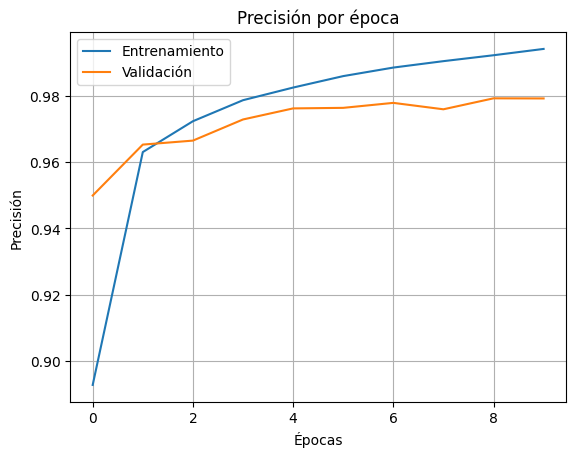

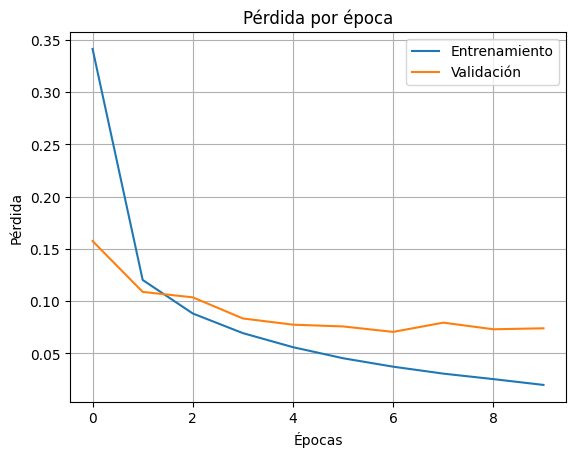

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

#Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


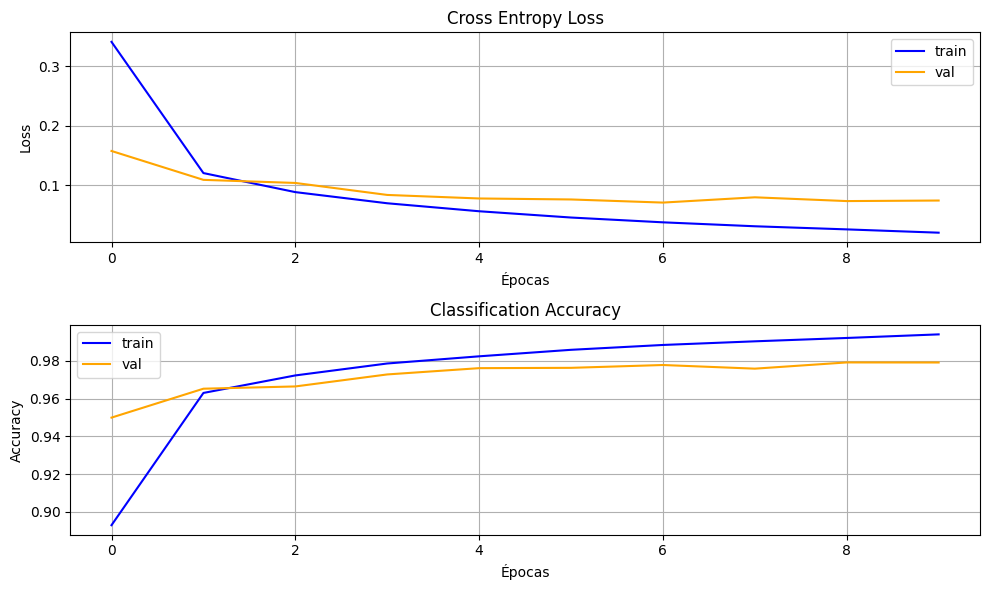

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Pérdida
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='val', color='orange')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.legend()
plt.grid(True)

# Precisión
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='val', color='orange')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
model.save("modelos/modeloCNN_VGG.keras")


print(train_generator.class_indices)       
print(train_generator.classes[:20])        


loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)


print("> %.3f" % (acc * 100.0))


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9793 - loss: 0.0739
> 97.920


### **Modelo CNN con Transformacion**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './MMNIST_reorganizado/train',
    target_size=(28, 28),
    color_mode='grayscale',      # <- nuevo
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    './MMNIST_reorganizado/test',
    target_size=(28, 28),
    color_mode='grayscale',      # <- nuevo
    batch_size=128,
    class_mode='categorical'
)



Found 180000 images belonging to 10 classes.
Found 30000 images belonging to 10 classes.


In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\juans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Guardar el mejor modelo
checkpoint = ModelCheckpoint(
    'modelos/CNN_transformacion.keras',  # ruta donde guardar
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7839 - loss: 0.7242
Epoch 1: val_loss improved from inf to 0.27566, saving model to modelos/CNN_transformacion.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 155s 110ms/step - accuracy: 0.7839 - loss: 0.7241 - val_accuracy: 0.9192 - val_loss: 0.2757
Epoch 2/10
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9269 - loss: 0.2520
Epoch 2: val_loss improved from 0.27566 to 0.20850, saving model to modelos/CNN_transformacion.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.9269 - loss: 0.2520 - val_accuracy: 0.9376 - val_loss: 0.2085
Epoch 3/10
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9457 - loss: 0.1810
Epoch 3: val_loss improved from 0.20850 to 0.17278, saving model to modelos/CNN_transformacion.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step - accuracy: 0.9457 - loss: 0.1810 - val_accuracy: 0.9476 - val_loss: 0.1728
Epoch 4/10
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.

### **Prueba de modelo con numeros**

##### **CNN**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


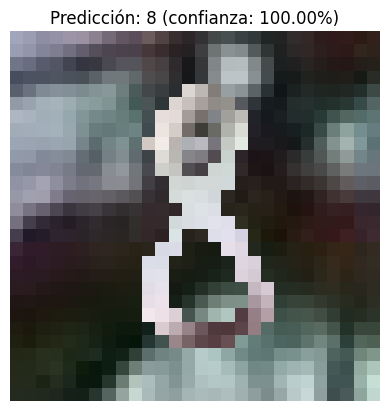

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    
    img = cv2.bitwise_not(img)

    
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    
    img = img.astype('float32') / 255.0

    
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    
    img = np.expand_dims(img, axis=0)

    
    pred = modelo.predict(img)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(cv2.cvtColor(cv2.imread(ruta_imagen), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()


modelo = load_model("modelos/modeloCNN.keras")


ruta = "MMNIST_reorganizado/test/8/m0_0.8.png"
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


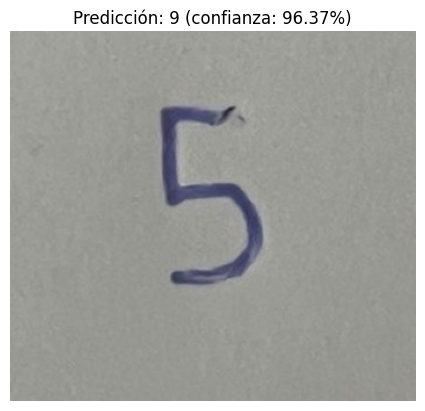

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    
    img = cv2.bitwise_not(img)

    
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    
    img = img.astype('float32') / 255.0

    
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    
    img = np.expand_dims(img, axis=0)

    
    pred = modelo.predict(img)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(cv2.cvtColor(cv2.imread(ruta_imagen), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()


modelo = load_model("modelos/modeloCNN.keras")


ruta = "tests/test.jpeg"
predecir_imagen_ruta(ruta, modelo)


#### **VGG con 2 capas**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


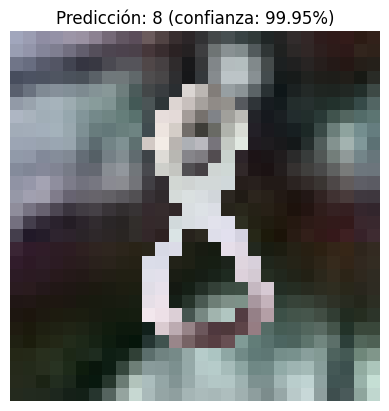

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    
    img = cv2.bitwise_not(img)

    
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    
    img = img.astype('float32') / 255.0

    
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    
    img = np.expand_dims(img, axis=0)

    
    pred = modelo.predict(img)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(cv2.cvtColor(cv2.imread(ruta_imagen), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()


modelo = load_model("modelos/modeloCNN_VGG.keras")


ruta = "MMNIST_reorganizado/test/8/m0_0.8.png"
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


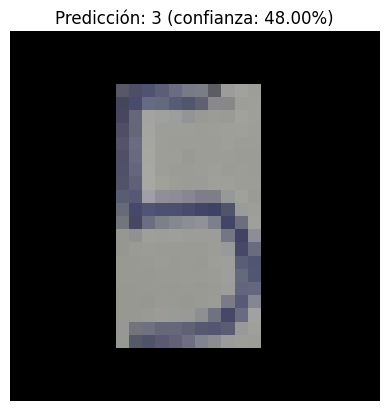

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img_color = cv2.imread(ruta_imagen)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    
    img_inv = cv2.bitwise_not(img_gray)

    
    _, img_bin = cv2.threshold(img_inv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print("No se detectó ningún número.")
        return

    
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    digit = img_color[y:y+h, x:x+w]

    
    aspect_ratio = w / h
    if aspect_ratio > 1:
        new_w = 20
        new_h = int(20 / aspect_ratio)
    else:
        new_h = 20
        new_w = int(20 * aspect_ratio)
    digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)

    
    canvas = np.zeros((28, 28, 3), dtype='uint8')
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized

    
    img_final = canvas.astype('float32') / 255.0
    img_final = np.expand_dims(img_final, axis=0)

    
    pred = modelo.predict(img_final)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()

modelo = load_model("modelos/modeloCNN_VGG.keras")
ruta = "tests/test.jpeg"
predecir_imagen_ruta(ruta, modelo)


### **CNN Transformado**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


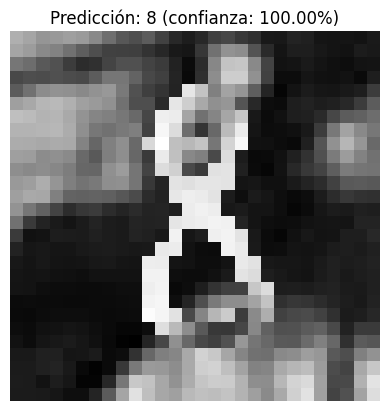

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    
    img = cv2.bitwise_not(img)

    
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0

    
    img = np.expand_dims(img, axis=-1)  
    img = np.expand_dims(img, axis=0)   

    
    pred = modelo.predict(img)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()


modelo = load_model("modelos/CNN_transformacion.keras")


ruta = "MMNIST_reorganizado/test/8/m0_0.8.png"
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


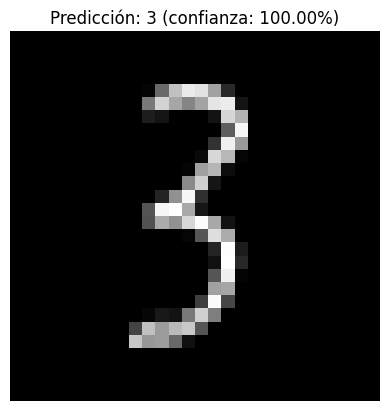

In [27]:
def predecir_imagen_ruta(ruta_imagen, modelo):
    
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    
    img_inv = cv2.bitwise_not(img)

    
    _, img_bin = cv2.threshold(img_inv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    if len(contours) == 0:
        print("No se detectó ningún número.")
        return

    
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    
    digit = img_bin[y:y+h, x:x+w]

    
    aspect_ratio = w / h
    if aspect_ratio > 1:
        new_w = 20
        new_h = int(20 / aspect_ratio)
    else:
        new_h = 20
        new_w = int(20 * aspect_ratio)
    digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)

    
    canvas = np.zeros((28, 28), dtype='uint8')

    
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized

    
    img_final = canvas.astype('float32') / 255.0

    
    img_final = np.expand_dims(img_final, axis=(0, -1))

    
    pred = modelo.predict(img_final)
    clase = np.argmax(pred)
    confianza = np.max(pred) * 100

    
    plt.imshow(canvas, cmap='gray')
    plt.title(f"Predicción: {clase} (confianza: {confianza:.2f}%)")
    plt.axis('off')
    plt.show()




modelo = load_model("modelos/CNN_transformacion.keras")
ruta = "tests/test2.jpeg"  
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


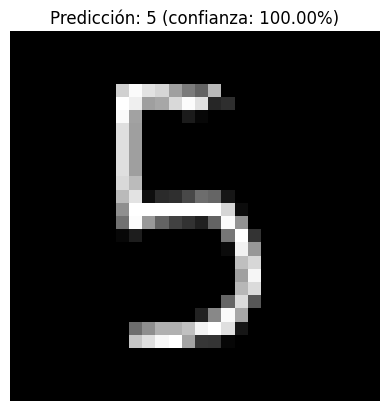

In [ ]:




modelo = load_model("modelos/CNN_transformacion.keras")
ruta = "tests/test.jpeg"  
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


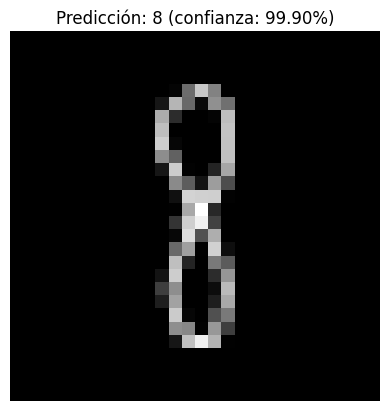

In [ ]:



modelo = load_model("modelos/CNN_transformacion.keras")
ruta = "tests/test3.jpeg"  
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


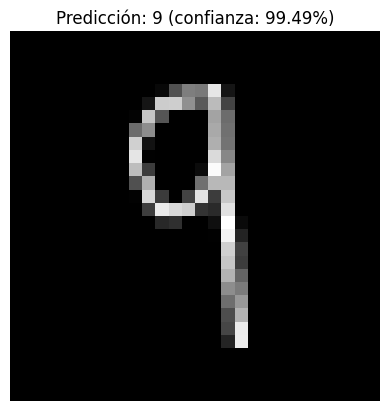

In [13]:


modelo = load_model("modelos/CNN_transformacion.keras")
ruta = "tests/test4.jpeg"  
predecir_imagen_ruta(ruta, modelo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


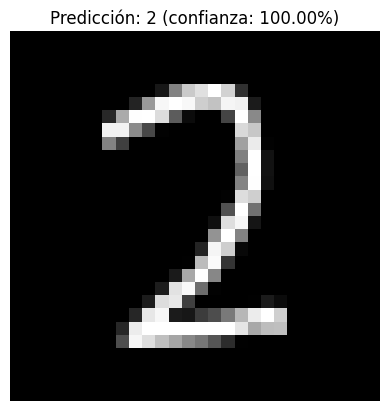

In [ ]:




modelo = load_model("modelos/CNN_transformacion.keras")
ruta = "tests/test5.jpeg"  
predecir_imagen_ruta(ruta, modelo)


### **Discusion**

Durante el experimento se desarrollaron tres variantes de redes neuronales convolucionales (CNN) con el objetivo de clasificar imágenes del conjunto de datos MNIST reorganizado. Cada modelo presenta una arquitectura y enfoque de preprocesamiento distinto, lo cual permite evaluar el impacto de la complejidad arquitectónica y las transformaciones de entrada en el desempeño.

El primer modelo corresponde a una CNN simple, compuesta por dos capas convolucionales con activación ReLU, seguidas por capas de max pooling, aplanamiento (Flatten) y una capa densa de salida con activación softmax. Este modelo fue entrenado con imágenes en formato RGB y sirvió como línea base. A pesar de su arquitectura sencilla, logró una precisión notable en el conjunto de validación, demostrando la eficacia de las CNN incluso en configuraciones básicas.

El segundo modelo incorpora una estructura inspirada en VGG, utilizando dos bloques de capas convolucionales seguidas de max pooling, con mayor profundidad en comparación con la CNN simple. El objetivo fue aumentar la capacidad de aprendizaje del modelo para capturar patrones más complejos. Este modelo mantuvo el uso de imágenes en RGB y superó ligeramente al modelo básico en desempeño, tanto en exactitud como en pérdida.

Finalmente, se entrenó un tercer modelo CNN con la misma arquitectura base, pero aplicando una transformación de escala de grises a las imágenes antes del entrenamiento. Este cambio redujo la dimensionalidad de entrada de tres canales (RGB) a uno, con el propósito de evaluar si la eliminación del color afectaba el rendimiento. Aunque el modelo fue competente, sus métricas de validación fueron ligeramente inferiores, indicando que en este caso particular, la información adicional proporcionada por los canales de color sí contribuía a una mejor generalización.

Se evaluaron dos versiones de un modelo CNN simple entrenado sobre el conjunto de datos MNIST reorganizado: uno utilizando imágenes en formato RGB (sin transformación de escala de grises) y otro con las imágenes convertidas a escala de grises antes del entrenamiento. Los resultados muestran que el modelo sin transformación (RGB) obtuvo un accuracy de 99.43 % en el conjunto de entrenamiento y 97.76 % en validación, con una pérdida de 0.0170 y 0.0917 respectivamente. En contraste, el modelo entrenado con imágenes en escala de grises alcanzó un accuracy de 98.01 % en entrenamiento y 96.06 % en validación, con una pérdida de 0.0599 y 0.1477 respectivamente.

Por otro lado, al momento de hacer la prueba con un número escrito a mano, el modelo CNN simple sin transformaciones no pudo detectar correctamente el número, mientras que el que sí aplicaba transformaciones pudo hacerlo con mayor efectividad. Esto se debe a que el modelo con transformaciones, al momento de recibir la imagen, la convierte en blanco y negro y elimina el "ruido" del fondo, dejando solo la silueta del número. Esto provoca que lo reconozca con mayor precisión, ya que se asemeja más a los patrones observados durante su entrenamiento.